# ДЗ NLP 1

Домашнее задание по NLP # 1 [100 баллов]
Классификация по тональности
В этом домашнем задании вам предстоит классифицировать по тональности отзывы на банки с сайта banki.ru.

Данные содержат непосредственно тексты отзывов, некоторую дополнительную информацию, а также оценку по шкале от 1 до 5.

Тексты хранятся в json-ах в массиве responses.

Посмотрим на пример отзыва:
## Часть 1. Анализ текстов [40/100]

1. Посчитайте количество отзывов в разных городах и на разные банки
2. Постройте гистограмы длин слов в символах и в словах
3. Найдите 10 самых частых:
    * слов
    * слов без стоп-слов
    * лемм 
    * существительных
4. Постройте кривые Ципфа и Хипса
5. Ответьте на следующие вопросы:
    * какое слово встречается чаще, "сотрудник" или "клиент"?
    * сколько раз встречается слова "мошенничество" и "доверие"?
6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру $tf-idf$, для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

 


In [2]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
!pip3 install pymorphy2

In [4]:

responses = []
with bz2.BZ2File('/content/drive/MyDrive/ML/nlp/banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [01:23, 2395.66it/s]


In [5]:
def py_normalform(text):
    try:
        nf = [pymorphy2_analyzer.parse(word)[0].normal_form for word in text.split()]
        return " ".join(nf)
    except:
        return ""

def py_tag1(text):
    #print([[word, pymorphy2_analyzer.parse(word)[0].tag.POS] for word in text.split()])
        d = {}
        d['words'] = ''
        d['p'] =''
        print(text.split())
        for word in text.split():
          print(word)
          d['words'].append(word)
          d['p'].append( pymorphy2_analyzer.parse(word)[0].tag.POS)
          print(pymorphy2_analyzer.parse(word)[0].tag.POS)
           #nf = [[word, pymorphy2_analyzer.parse(word)[0].tag.POS]  for word in text.split()]
        print(d)
        
def py_tag(text):
          return [[word, pymorphy2_analyzer.parse(word)[0].tag]  for word in text.split()]

       

In [6]:
import re
regex = re.compile("[А-Яа-я.!?]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']

print(mystopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'на

In [8]:
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""


In [9]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [10]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]
      

chunked_list_ids=chunks(responses[0:10000],100)
for list_temp in chunked_list_ids: 
  for row in list_temp:
    row.setdefault('clear',[]).append(py_normalform(remove_stopwords(words_only(row.get('text')))))


In [11]:
chunked_list_ids=chunks(responses[0:10000],100)
for list_temp in chunked_list_ids: 
  for row in list_temp:
    row.setdefault('POS',[]).append(py_tag(row.get('clear')[0]))

In [ ]:
responses[0]

In [13]:
df = pd.DataFrame(responses[0:10000])
df['rating_grade'] = df['rating_grade'].fillna(0)
df = df.drop(['bank_license','author','datetime'], 1)

In [14]:
def py_normalform(text):
    try:
        nf = [pymorphy2_analyzer.parse(lemma) for text in text for lemma in text.split()][0].normal_form
        return " ".join(nf)
    except:
        return ""
 

### Предобработка текста для анализа

Оставим только русские буквы и знаки пунктуации для разделения по приложениям

Удалим стоп слова в предложениях.

In [15]:
df.text = df.text.str.lower()
df = df.assign(text_wo=lambda x: df.text.apply(words_only))
df = df.assign(text_wosw=lambda x: df.text_wo.apply(remove_stopwords))


Составим корпус текста и по нему проведем лематизаци для анализа

In [16]:
words_all = [words for text in df.text for words in text.split()]
print('Корпус слов:', len(words_all))

Корпус слов: 2096999


In [17]:
words_all_wosw = [words for text_wosw in df.text_wosw for words in text_wosw.split()]
print('Корпус без стоп слов:', len(words_all_wosw))

Корпус без стоп слов: 1332528


Лематизируем столбец без стоп слов

In [18]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]
      
lemma = []
chunked_list_ids=chunks(words_all_wosw,100)
for list_temp in chunked_list_ids:   
    lemma = lemma + [pymorphy2_analyzer.parse(token)[0].normal_form for token in list_temp]

    

Определяем часть речи

In [19]:
def py_pos_noun(pos_list):
  list_n = []
  for row in pos_list:
     for i in range(len(row)):
        if 'NOUN' in row[i][1]: 
          list_n.append(row[i][0])
  return list_n


In [20]:
df = df.assign(text_noun=lambda x: df.POS.apply(py_pos_noun))

In [21]:
words_noun = [py_pos_noun(word) for word in df.POS]
noun = []

for list_temp in words_noun:   
    noun = noun + [token for token in list_temp]

print('Корпус существительных:', len(noun))

Корпус существительных: 556423


Лемматизированные тексты разбиваем на предложения

In [22]:
!pip install rusenttokenize

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize
from rusenttokenize import ru_sent_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation
punctuation

sents = sent_tokenize(df.text_wosw[10])

print(len(sents))
print(*sents, sep='\n')

In [25]:
df = df.assign(sent=lambda x: df.text_wosw.apply(sent_tokenize))

### Посчитайте количество отзывов в разных городах и на разные банки

In [27]:
df['city'].str.lower().value_counts()

г. москва                           4588
г. санкт-петербург                   934
г. екатеринбург                      177
г. новосибирск                       161
г. нижний новгород                   141
                                    ... 
г. иловля                              1
г. агинское (забайкальский край)       1
г. надым                               1
г. контактный центр                    1
г. яблоновский                         1
Name: city, Length: 728, dtype: int64

In [28]:
df['bank_name'].str.lower().value_counts()

сбербанк россии                   1696
альфа-банк                         709
втб 24                             616
русский стандарт                   560
хоум кредит банк                   538
                                  ... 
агропромкредит                       1
банк город                           1
миллениум банк                       1
муниципальный камчатпрофитбанк       1
внешэкономбанк                       1
Name: bank_name, Length: 246, dtype: int64

Постройте гистограмы длин слов в символах и в словах

In [29]:
from collections import Counter
corpus = [token for tt in df.text for token in word_tokenize(tt) if token not in punctuation]

(array([     0., 509983., 413965., 249201., 399169., 303318., 226230.,
         13574.,   2283.]),
 array([ 0,  1,  3,  5,  6,  8, 10, 15, 18, 20]),
 <a list of 9 Patch objects>)

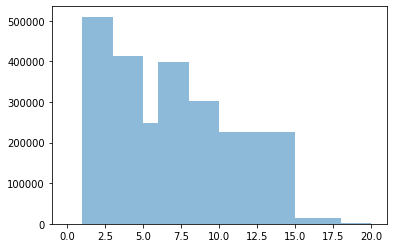

In [30]:
lenc = [len(w) for w in corpus]

plt.hist(lenc,bins=[0, 1,3,5,6,8,10,15,18,20], alpha=0.5)

Для ДЗ сокртила выборку до 10000 отзывов из-за проблем спроизводительностью  

In [31]:
df

,city,rating_not_checked,title,num_comments,bank_name,text,rating_grade,clear,POS,text_wo,text_wosw,text_noun,sent
0,г. Москва,False,Жалоба,0,Бинбанк,добрый день! я не являюсь клиентом банка и пор...,0.0,[добрый день! я являться клиент банк поручител...,"[[[добрый, ADJF,Qual masc,sing,nomn], [день!, ...",добрый день! я не являюсь клиентом банка и пор...,добрый день! являюсь клиентом банка поручителе...,"[клиент, банк, поручитель, договор, лицо, отно...","[добрый день!, являюсь клиентом банка поручите..."
1,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,Сбербанк России,доброго дня! являюсь держателем зарплатной кар...,0.0,[добрый дня! являться держатель зарплатный кар...,"[[[добрый, ADJF,Qual masc,sing,nomn], [дня!, U...",доброго дня! являюсь держателем зарплатной кар...,доброго дня! являюсь держателем зарплатной кар...,"[держатель, карта, сбербанк, год, фамилия, бан...","[доброго дня!, являюсь держателем зарплатной к..."
2,г. Москва,False,Двойное списание за один товар.,1,Бинбанк,здравствуйте! дублирую свое заявление от 03.0...,0.0,[здравствуйте! дублировать свой заявление . . ...,"[[[здравствуйте!, UNKN], [дублировать, INFN,pe...",здравствуйте! дублирую свое заявление от . . в...,здравствуйте! дублирую свое заявление . . можа...,"[заявление, карта, покупка, интернет, магазин,...","[здравствуйте!, дублирую свое заявление ., ., ..."
3,г. Ставрополь,False,Меняют проценты комиссии не предупредив и не ...,2,Сбербанк России,добрый день!! я открыл расчетный счет в сберба...,0.0,[добрый день!! я открыть расчётный счёт сберба...,"[[[добрый, ADJF,Qual masc,sing,nomn], [день!!,...",добрый день!! я открыл расчетный счет в сберба...,добрый день!! открыл расчетный счет сбербанке ...,"[счёт, сбербанк, договор, комиссия, перевод, с...","[добрый день!!, открыл расчетный счет сбербанк..."
4,г. Челябинск,False,Верните денежные средства за страховку,1,ОТП Банк,"04.03.2015 г. взяла кредит в вашем банке, заяв...",0.0,[. . г. взять кредит ваш банк заявить я сумма ...,"[[[., PNCT], [., PNCT], [г., UNKN], [взять, IN...",. . г. взяла кредит в вашем банке заявленная м...,. . г. взяла кредит вашем банке заявленная мно...,"[кредит, банк, сумма, рубль, менеджер, срок, к...","[., ., г. взяла кредит вашем банке заявленная ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,г. Саратов,False,Сплошной обман!,4,ВТБ 24,в ноябре стал обладателем золотой кредитной ка...,0.0,[в ноябрь стать обладатель золотой кредитный к...,"[[[в, PREP], [ноябрь, NOUN,inan,masc sing,nomn...",в ноябре стал обладателем золотой кредитной ка...,ноябре стал обладателем золотой кредитной карт...,"[ноябрь, обладатель, карта, втб, ржд, вс, теле...",[ноябре стал обладателем золотой кредитной кар...
9996,г. Москва,False,Незаконный кредит!,1,ОТП Банк,"добрый день. я человек, который в жизни не свя...",0.0,[добрый день. я человек который жизнь связыват...,"[[[добрый, ADJF,Qual masc,sing,nomn], [день., ...",добрый день. я человек который в жизни не связ...,добрый день. человек который жизни связывался ...,"[человек, жизнь, письмо, банк, информация, тел...","[добрый день., человек который жизни связывалс..."
9997,г. Казань,False,Качество обслуживания,0,Тинькофф Банк,добрый день! в мае 2014 оформила кредит на тел...,5.0,[добрый день! в май оформить кредит телефон св...,"[[[добрый, ADJF,Qual masc,sing,nomn], [день!, ...",добрый день! в мае оформила кредит на телефон ...,добрый день! мае оформила кредит телефон связн...,"[май, кредит, телефон, кредит, товар, тинькофф...","[добрый день!, мае оформила кредит телефон свя..."
9998,г. Екатеринбург,False,Желания не исполнились,2,Югра,заключил в операционном офисе в г. екатеринбур...,1.0,[заключить операционный офис г. екатеринбург ф...,"[[[заключить, INFN,perf,tran], [операционный, ...",заключил в операционном офисе в г. екатеринбур...,заключил операционном офисе г. екатеринбурге ф...,"[офис, екатеринбург, филиал, ооо, акб, югра, т...",[заключил операционном офисе г. екатеринбурге ...


### Найдите 10 самых частых:
- слов
- слов без стоп-слов
- лемм
- существительных

In [32]:
freq_dict_wosw = Counter(words_all)
freq_dict_wosw.most_common(10)

[('в', 74123),
 ('и', 59679),
 ('не', 49216),
 ('на', 40651),
 ('что', 34486),
 ('я', 32161),
 ('с', 27470),
 ('по', 21994),
 ('мне', 17981),
 ('-', 13520)]

### Часто используемые слова без стоп слов

In [33]:
freq_dict_wosw = Counter(words_all_wosw)
freq_dict_wosw.most_common(10)

[('.', 34838),
 ('банка', 14450),
 ('банк', 12562),
 ('деньги', 6156),
 ('карты', 5147),
 ('карту', 4744),
 ('кредит', 4014),
 ('заявление', 3699),
 ('г.', 3415),
 ('банке', 3407)]

### Часто используемые леммы

In [34]:
freq_dict_lemma = Counter(lemma)
freq_dict_lemma.most_common(10)

[('банк', 35591),
 ('.', 34838),
 ('карта', 16218),
 ('мой', 10756),
 ('который', 9095),
 ('сотрудник', 8880),
 ('деньга', 8219),
 ('кредит', 8062),
 ('день', 7127),
 ('клиент', 6498)]

Часто используемые существительные

In [35]:
freq_dict_wosw = Counter(noun)
freq_dict_wosw.most_common(10)

[('банк', 35591),
 ('карта', 16218),
 ('сотрудник', 8880),
 ('деньга', 8219),
 ('кредит', 8062),
 ('день', 7127),
 ('клиент', 6498),
 ('сумма', 6488),
 ('отделение', 6390),
 ('счёт', 5990)]

### Постройте кривые Ципфа и Хипса

Закон Ципфа

Эмпирическая закономерность: если все слова корпуса текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n. Иными словами, частотность слов убывает очень быстро

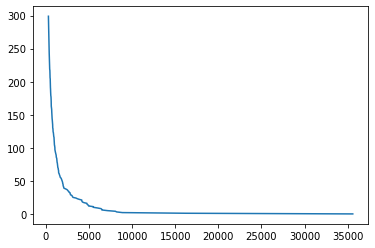

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

freqs = list(freq_dict_wosw.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

Кривая Хипса

Закон Хипса -- обратная сторона закона Ципфа. Он описывает, что чем больше корпус, тем меньше новых слов добавляется с добавлением новых текстов. В какой-то момент корпус насыщается.

In [37]:
from string import punctuation
punctuation

from nltk.tokenize import word_tokenize
from tqdm import tqdm

dfs = df[0:100]
cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for index, row in tqdm(dfs.iterrows(), total = len(dfs)):
    tokens = word_tokenize(row['text'])
    #print(tokens)
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))    
    n_tokens.append(sum(cnt.values()))

100%|██████████| 100/100 [00:00<00:00, 556.10it/s]


In [38]:
print(len(n_words))
print(len(n_tokens))

100
100


Ответьте на следующие вопросы:
какое слово встречается чаще, "сотрудник" или "клиент"?
  - сотрудник
  
сколько раз встречается слова "мошенничество" и "доверие"?


In [39]:
print("Частота слова сотрудник:")
print(freq_dict_lemma.get('сотрудник'))
print("Частота слова клиент:")
print(freq_dict_lemma.get('клиент'))
print("Частота слова мошенничество:")
print(freq_dict_lemma.get('мошенничество'))
print("Частота слова доверие:")
print(freq_dict_lemma.get('доверие'))

Частота слова сотрудник:
8880
Частота слова клиент:
6498
Частота слова мошенничество:
166
Частота слова доверие:
133


### **В** поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру  𝑡𝑓−𝑖𝑑𝑓 , для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [72]:
df.loc[:,'rating'] =  df[df.loc[:,'rating_grade'] >3]['rating_grade']
df.loc[:,'label1'] =  df[df.loc[:,'rating_grade'] <=3]['rating_grade']
#df.loc[:,'label1'] =  df.loc[:,'label1'].fillna('possitive')
df.loc[:,'rating'] =  df[df.loc[:,'rating_grade'] >3]['label1']
df.loc[:,'rating'] =  df[df.loc[:,'rating_grade'] <=3]['label']
df.loc[:,'rating'] =  df.loc[:,'rating'].fillna('possitive')

In [85]:
import nltk
from nltk.collocations import *

Посмотрим ключевые слова сначала для **позитивных** отзывов и **негативных** отзывов

In [123]:
words_negative = [words for text in df[df.loc[:,'rating'] == 'negative']['text_wosw'] for words in text.split()]
print('Корпус негативных отзывов:', len(words_negative))
words_possitive = [words for text in df[df.loc[:,'rating'] == 'possitive']['text_wosw'] for words in text.split()]
print('Корпус позитивных отзывов:', len(words_possitive))

Корпус негативных отзывов: 1256832
Корпус позитивных отзывов: 75696


In [129]:
%%time 
bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(words_possitive) # класс для хранения и извлечения биграм
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз
N_best = 100 # число извлекаемых биграм
# выбираем топ-100 биграм по каждой мере
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)]
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)]
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

CPU times: user 190 ms, sys: 3 ms, total: 193 ms
Wall time: 193 ms


In [130]:
rankings = pd.DataFrame({
    'chi2': chi2_ranking,
    't-score' : tscore_ranking,
    'pmi': pmi_ranking,
    'raw_freq':raw_freq_ranking
})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2']]
rankings.head(15)

,raw_freq,pmi,t-score,chi2
0,. .,русская зима,. .,маршала бирюзова
1,интернет банк,тель авив,интернет банк,русская зима
2,следующий день,торговая точка,следующий день,тель авив
3,клиентом банка,маршала бирюзова,являюсь клиентом,торговая точка
4,являюсь клиентом,расчетно кассовое,клиентом банка,русский стандарт
5,хочу выразить,приведи друга,хочу выразить,нижний новгород
6,выразить благодарность,народный рейтинг,выразить благодарность,приведи друга
7,отделение банка,платежный инструмент,добрый день!,горячую линию
8,добрый день!,торговую точку,отделение банка,расчетно кассовое
9,интернет банке,человеческий фактор,интернет банке,санкт петербург


In [126]:
%%time 
bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(words_negative) # класс для хранения и извлечения биграм

finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз
N_best = 100 # число извлекаемых биграм
# выбираем топ-100 биграм по каждой мере
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)]
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)]
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

CPU times: user 3.83 s, sys: 37 ms, total: 3.87 s
Wall time: 3.88 s


In [128]:
rankings = pd.DataFrame({
    'chi2': chi2_ranking,
    't-score' : tscore_ranking,
    'pmi': pmi_ranking,
    'raw_freq':raw_freq_ranking
})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2']]
rankings.head(15)

,raw_freq,pmi,t-score,chi2
0,. .,акционерным обществом,. .,акционерным обществом
1,. г.,безопасным каналом,. г.,барыня сударыня
2,денежных средств,жажда наживы,денежных средств,безопасным каналом
3,денежные средства,ион стайл,денежные средства,гис гмп
4,добрый день!,мадрид испания,добрый день!,деятельности... утверждено
5,отделение банка,медсестре неврогического,являюсь клиентом,дуси ковальчук
6,сотрудники банка,мные генпрокуратуры,сотрудники банка,жажда наживы
7,являюсь клиентом,моргнув глазом,отделение банка,запрещается обусловливать
8,горячую линию,наилучшими пожеланиями,горячую линию,ион стайл
9,номер телефона,правдами неправдами,номер телефона,клянутся приложат


В негативных отзывах больше экспрессивных слов и чаще встречается "сотрудник", в положительных отмечают акции банка

#  Часть 2. Тематическое моделирование [20/100]

1. Постройте несколько тематических моделей коллекции документов с разным числом тем. Приведите примеры понятных (интерпретируемых) тем.
2. Найдите темы, в которых упомянуты конкретные банки (Сбербанк, ВТБ, другой банк). Можете ли вы их прокомментировать / объяснить?

Эта часть задания может быть сделана с использованием gensim.

In [132]:
df.head(4)

,city,rating_not_checked,title,num_comments,bank_name,text,rating_grade,clear,POS,text_wo,text_wosw,text_noun,sent,rating,label,label1
0,г. Москва,False,Жалоба,0,Бинбанк,добрый день! я не являюсь клиентом банка и пор...,0.0,[добрый день! я являться клиент банк поручител...,"[[[добрый, ADJF,Qual masc,sing,nomn], [день!, ...",добрый день! я не являюсь клиентом банка и пор...,добрый день! являюсь клиентом банка поручителе...,"[клиент, банк, поручитель, договор, лицо, отно...","[добрый день!, являюсь клиентом банка поручите...",negative,negative,0.0
1,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,Сбербанк России,доброго дня! являюсь держателем зарплатной кар...,0.0,[добрый дня! являться держатель зарплатный кар...,"[[[добрый, ADJF,Qual masc,sing,nomn], [дня!, U...",доброго дня! являюсь держателем зарплатной кар...,доброго дня! являюсь держателем зарплатной кар...,"[держатель, карта, сбербанк, год, фамилия, бан...","[доброго дня!, являюсь держателем зарплатной к...",negative,negative,0.0
2,г. Москва,False,Двойное списание за один товар.,1,Бинбанк,здравствуйте! дублирую свое заявление от 03.0...,0.0,[здравствуйте! дублировать свой заявление . . ...,"[[[здравствуйте!, UNKN], [дублировать, INFN,pe...",здравствуйте! дублирую свое заявление от . . в...,здравствуйте! дублирую свое заявление . . можа...,"[заявление, карта, покупка, интернет, магазин,...","[здравствуйте!, дублирую свое заявление ., ., ...",negative,negative,0.0
3,г. Ставрополь,False,Меняют проценты комиссии не предупредив и не ...,2,Сбербанк России,добрый день!! я открыл расчетный счет в сберба...,0.0,[добрый день!! я открыть расчётный счёт сберба...,"[[[добрый, ADJF,Qual masc,sing,nomn], [день!!,...",добрый день!! я открыл расчетный счет в сберба...,добрый день!! открыл расчетный счет сбербанке ...,"[счёт, сбербанк, договор, комиссия, перевод, с...","[добрый день!!, открыл расчетный счет сбербанк...",negative,negative,0.0


In [133]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities
from gensim.models import lsimodel

In [134]:
texts = [text.split() for text in df.text]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [137]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

Латентно-семантический анализ (LSA, LSI)   - выберем 5 тем и посмотрим состав слов

In [138]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30)


CPU times: user 22.4 s, sys: 1.29 s, total: 23.7 s
Wall time: 16.2 s


In [139]:
lsi.show_topics(5)

[(0,
  '0.120*"-" + 0.120*"я" + 0.116*"мне" + 0.092*"меня" + 0.087*"деньги" + 0.087*"о" + 0.085*"что" + 0.084*"у" + 0.084*"банк" + 0.083*"это"'),
 (1,
  '0.305*"звонки" + 0.234*"номер" + 0.190*"персональных" + 0.189*"поступают" + 0.172*"мой" + 0.171*"телефона" + 0.169*"удалить" + 0.161*"базы" + 0.158*"обработку" + 0.150*"согласия"'),
 (2,
  '-0.159*"денежных" + -0.147*"денежные" + -0.144*"средств" + -0.144*"средства" + -0.138*"г." + 0.125*"-" + -0.114*"2015" + -0.111*"заявление" + -0.104*"№" + -0.101*"руб."'),
 (3,
  '-0.208*"кредит" + 0.184*"деньги" + 0.176*"карты" + 0.168*"карту" + -0.147*"кредита" + 0.145*"банкомат" + -0.122*"договор" + 0.107*"карта" + -0.104*"договора" + 0.101*"обработку"'),
 (4,
  '0.270*"вклад" + 0.264*"вклада" + 0.133*"-" + 0.102*"условия" + -0.098*"смс" + 0.095*"договора" + 0.090*"персональных" + 0.088*"цб" + -0.088*"банкомат" + -0.087*"мне"')]

In [ ]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
# %%time
index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]

Поиск скрытых тем. Банков очень много, для визуализации оставим только 15 самых часто упоминаемых

In [180]:
top = pd.DataFrame(df.bank_name.value_counts().head(10))
top.index

Index(['Сбербанк России', 'Альфа-Банк', 'ВТБ 24', 'Русский Стандарт',
       'Хоум Кредит Банк', 'Тинькофф Банк', 'Восточный Экспресс Банк',
       'Московский Кредитный Банк', 'ОТП Банк', 'Национальный Банк «Траст»'],
      dtype='object')

In [181]:
top = df.bank_name.value_counts().head(15)
df.loc[:,'top_bank'] =  df[df.loc[:,'bank_name'].isin(top.index)]['bank_name']
df.loc[:,'top_bank'] =  df.loc[:,'top_bank'].fillna('other')

In [182]:
X = [0] * len(df)
Y = [0] * len(df)
for i in range(len(df)):
    vec = corpus[i]
    LSI_topics = (lsi[vec])
    for topic in LSI_topics:
        if topic[0] == 0:
            X[i] = topic[1]
        elif topic[0] == 1:
            Y[i] = topic[1]

vis_df = pd.DataFrame({'X': X, 'Y': Y, 'topic' : df.top_bank})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


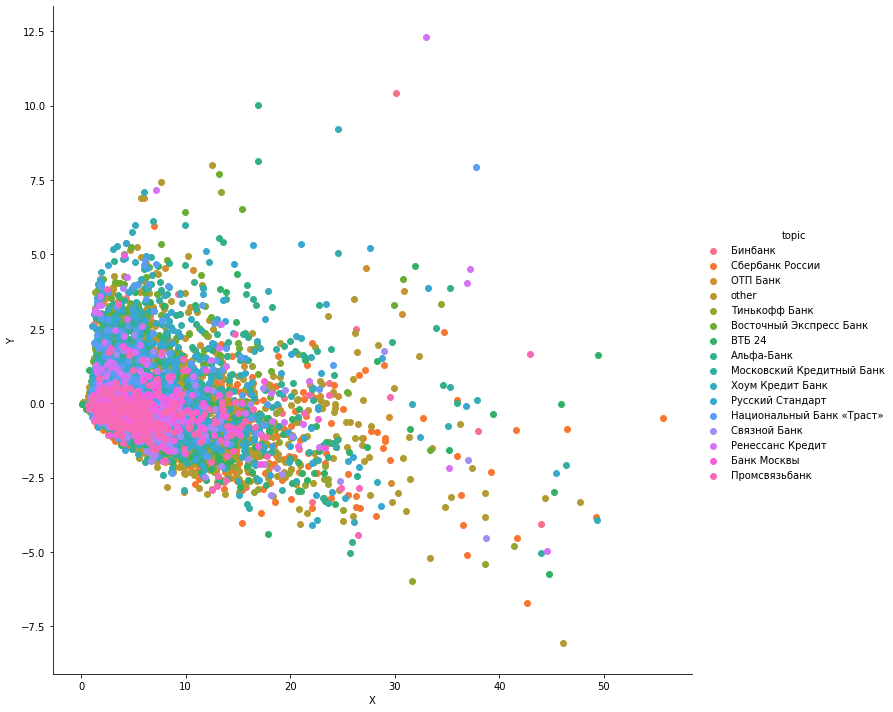

In [183]:
sns.FacetGrid(vis_df, hue="topic", size = 10).map(plt.scatter, "X", "Y").add_legend()

# Часть 3 . Классификация текстов [40/100]

Сформулируем для простоты задачу бинарной классификации: будем классифицировать на два класса, то есть, различать резко отрицательные отзывы (с оценкой 1) и положительные отзывы (с оценкой 5). 

1.  Составьте обучающее и тестовое множество: выберите из всего набора данных N1 отзывов с оценкой 1 и N2 отзывов с оценкой 5 (значение N1 и N2 – на ваше усмотрение). Используйте ```sklearn.model_selection.train_test_split``` для разделения множества отобранных документов на обучающее и тестовое. 
2. Используйте любой известный вам алгоритм классификации текстов для решения задачи и получите baseline. Сравните разные варианты векторизации текста: использование только униграм, пар или троек слов или с использованием символьных $n$-грам. 
3. Сравните, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков:
* 1-ый вариант: $tf-idf$ преобразование (```sklearn.feature_extraction.text.TfidfTransformer```) и сингулярное разложение (оно же – латентый семантический анализ) (```sklearn.decomposition.TruncatedSVD```), 
* 2-ой вариант: тематические модели LDA (```sklearn.decomposition.LatentDirichletAllocation```). 

Используйте accuracy и F-measure для оценки качества классификации. 

Ниже написан примерный Pipeline для классификации текстов. 

Эта часть задания может быть сделана с использованием sklearn. 

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
x_train, x_test, y_train, y_test = train_test_split(df.text, df.rating)

Для биграмм метрики показывают результат хуже

In [202]:
vec = TfidfVectorizer(ngram_range=(1, 3))   # для униграммы, биграммы и триграммы.
bow = vec.fit_transform(x_train)

clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.94      0.97      2500
   possitive       0.00      0.00      0.00         0

    accuracy                           0.94      2500
   macro avg       0.50      0.47      0.48      2500
weighted avg       1.00      0.94      0.97      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
vec = TfidfVectorizer(ngram_range=(1, 1))   # униграммы
bow = vec.fit_transform(x_train)

clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.94      0.97      2492
   possitive       0.03      0.50      0.05         8

    accuracy                           0.94      2500
   macro avg       0.51      0.72      0.51      2500
weighted avg       1.00      0.94      0.96      2500



ngram_range=(1, 1) -- униграммы
ngram_range=(3, 3) -- триграммы
ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

Сократим размерность для визуализации 

In [259]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [205]:
vectors = TfidfVectorizer().fit_transform(df.text) # строим тф-идф матрицу документ-слово
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors) # оставляем n главных компонент

In [210]:
# %%time
X_embedded = TSNE(n_components=3, perplexity=5, verbose=0).fit_transform(X_reduced) # строим мэппинг в двухмерную плоскость с TSNE

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


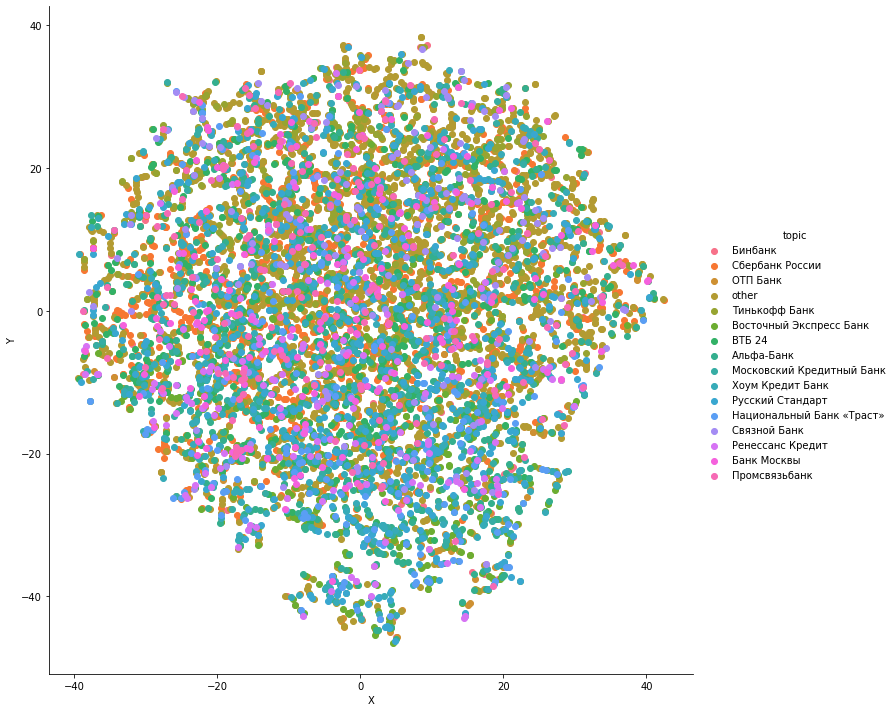

In [211]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.top_bank})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

Тематика отзывов (слова используемые в отзывах) равномерно распределена между всеми банками. 

Повторим для корпуса без стоп слов как зависит от тематики отзыва( негативные, позитивные). Изменим perplexity - увеличим расстояние между кластерами

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


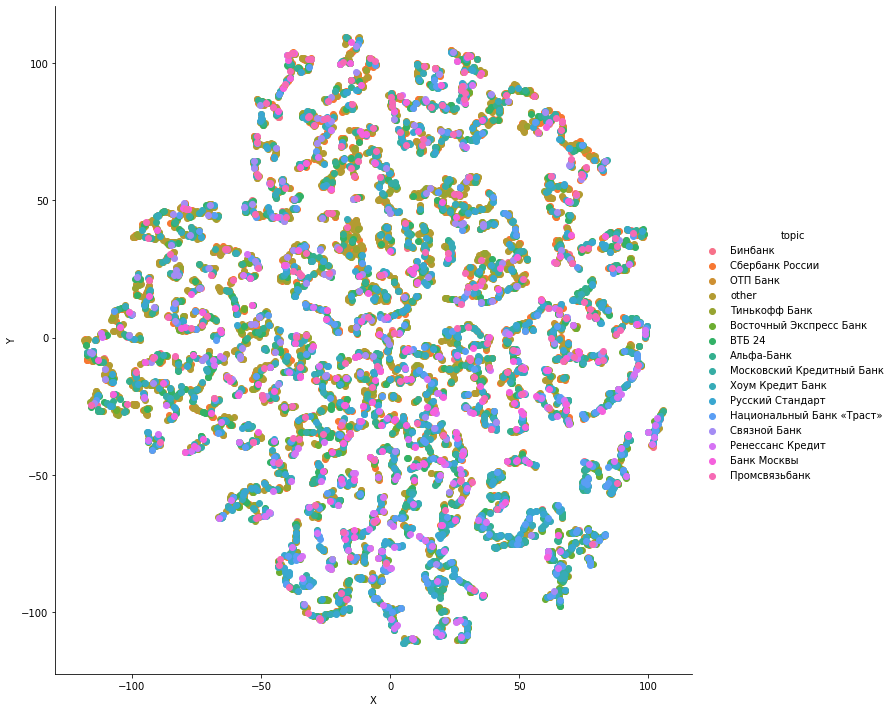

In [213]:
vectors = TfidfVectorizer().fit_transform(df.text_wosw) # строим тф-идф матрицу документ-слово
X_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(vectors) # оставляем n главных компонент
X_embedded = TSNE(n_components=2, perplexity=15, verbose=0).fit_transform(X_reduced) # строим мэппинг в двухмерную плоскость с TSNE
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.top_bank})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


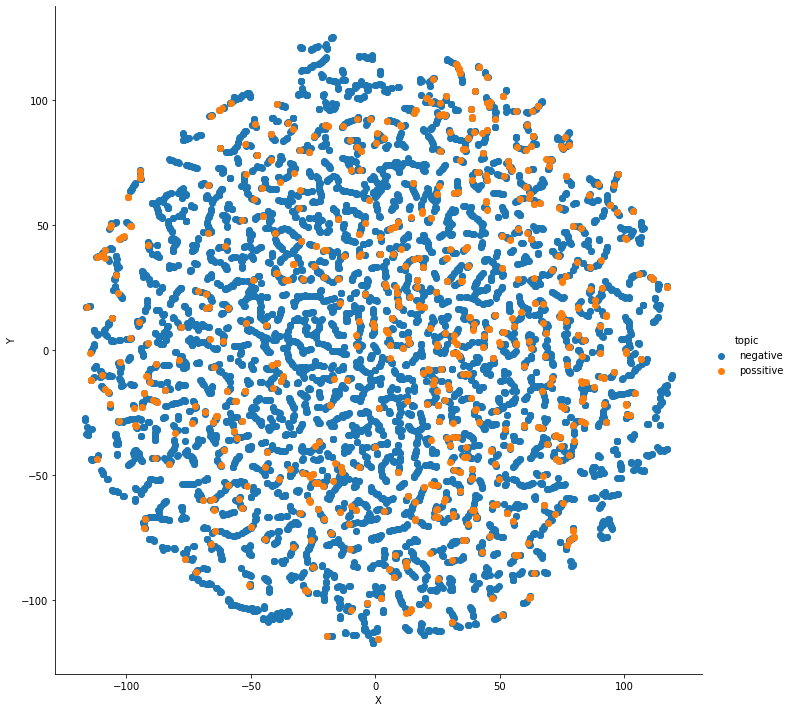

In [215]:
vectors = TfidfVectorizer().fit_transform(df.text_wosw) # строим тф-идф матрицу документ-слово
X_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(vectors) # оставляем n главных компонент
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced) # строим мэппинг в двухмерную плоскость с TSNE
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.rating})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

**Вариант 1** используем векторизацию TF IDF и сократим размерность с помощью **TruncatedSVD**

испоьзуем полученные фичи для классификации по типу отзыва (негативный позитивный) и по банку (топ 15)

In [245]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.top_bank)

In [291]:
def reduce_dimensionality(X, n_features):
        # Initialize reduction method: PCA or SVD
        #reducer = PCA(n_components=n_features)
        reducer = TruncatedSVD(n_components=n_features)

        #reducer = LatentDirichletAllocation(n_components=n_features)

        # Fit and transform data to n_features-dimensional space
        reducer.fit(X)
        X = reducer.transform(X)
        return X 

In [247]:
vec = TfidfVectorizer(ngram_range=(3, 3))   


vectors = vec.fit_transform(x_train) # строим тф-идф матрицу документ-слово
vectors_test = vec.fit_transform(x_test)
X_reduced = reduce_dimensionality(vectors,14) # сокращаем размерность
x_test_reduced = reduce_dimensionality(vectors_test,14)

clf = LogisticRegression(random_state=42)
clf.fit(X_reduced, y_train)
pred = clf.predict(x_test_reduced)
print(classification_report(pred, y_test))

                           precision    recall  f1-score   support

                    other       0.99      0.32      0.48      2484
               Альфа-Банк       0.00      0.00      0.00         2
              Банк Москвы       0.00      0.00      0.00         0
                  Бинбанк       0.00      0.00      0.00         0
                   ВТБ 24       0.00      0.00      0.00         0
  Восточный Экспресс Банк       0.04      0.36      0.07        11
Московский Кредитный Банк       0.00      0.00      0.00         0
Национальный Банк «Траст»       0.00      0.00      0.00         0
                 ОТП Банк       0.00      0.00      0.00         0
            Промсвязьбанк       0.00      0.00      0.00         0
         Ренессанс Кредит       0.00      0.00      0.00         0
         Русский Стандарт       0.00      0.00      0.00         0
          Сбербанк России       0.00      0.00      0.00         3
             Связной Банк       0.00      0.00      0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.rating)

In [240]:
from sklearn.svm import LinearSVC
linear_clf = LinearSVC()
linear_clf.fit(X_reduced, y_train)
pred = linear_clf.predict(x_test_reduced)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.94      0.97      2500
   possitive       0.00      0.00      0.00         0

    accuracy                           0.94      2500
   macro avg       0.50      0.47      0.49      2500
weighted avg       1.00      0.94      0.97      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:
x_train, x_test, y_train, y_test = train_test_split(df.text_wosw, df.rating)

In [267]:


vec = TfidfVectorizer(ngram_range=(1, 1))   


vectors = vec.fit_transform(x_train) # строим тф-идф матрицу документ-слово
vectors_test = vec.fit_transform(x_test)
X_reduced = reduce_dimensionality(vectors,2000) # сокращаем размерность
x_test_reduced = reduce_dimensionality(vectors_test,2000)


linear_clf = LogisticRegression(random_state=42)
linear_clf.fit(X_reduced, y_train)
pred = linear_clf.predict(x_test_reduced)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.94      0.97      2500
   possitive       0.00      0.00      0.00         0

    accuracy                           0.94      2500
   macro avg       0.50      0.47      0.48      2500
weighted avg       1.00      0.94      0.97      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Вариант 2**   используя **LatentDirichletAllocation** находим скрытые темы, и подаем их в логистическу регрессию

In [283]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,  # minimum reqd occurences of a word                             
                             )
vectors = vectorizer.fit_transform(x_train)

In [284]:

lda_model = LatentDirichletAllocation(n_components=20,           
                                      max_iter=10,               

                                      learning_method='online',   
                                      random_state=100,          

                                      batch_size=128,           # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,          # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(vectors)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [285]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(vectors))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(vectors))
# See model parameters
print(lda_model.get_params())

Log Likelihood:  -6718081.789403481
Perplexity:  3147.4141305083567
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [286]:
# Create Document — Topic Matrix
lda_output = lda_model.transform(vectors)
# column names
topicnames = ['Topic' + str(i) for i in range(lda_model.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(x_train))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic
Doc0,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,1
Doc1,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,14
Doc2,0.210000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.200000,0.000000,11
Doc3,0.000000,0.000000,0.000000,0.350000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.090000,0.000000,0.070000,0.000000,0.200000,0.000000,0.000000,0.000000,3
Doc4,0.360000,0.090000,0.150000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
Doc5,0.140000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390000,0.000000,0.000000,0.000000,0.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
Doc6,0.340000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,9
Doc7,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,1
Doc8,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,2
Doc9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.250000,0.000000,0.000000,0.070000,0.000000,0.340000,0.000000,0.300000,0.000000,16


In [290]:

vectors = lda_model.transform(vectorizer.fit_transform(x_train)) 
vectors_test = lda_model.fit_transform(vectorizer.fit_transform(x_test))


linear_clf = LogisticRegression(random_state=42)
linear_clf.fit(vectors, y_train)
pred = linear_clf.predict(vectors_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.94      0.97      2499
   possitive       0.00      0.00      0.00         1

    accuracy                           0.94      2500
   macro avg       0.50      0.47      0.48      2500
weighted avg       1.00      0.94      0.97      2500



**Заключение**.  Возможно из-за того что выборка была сокращена, все модели классификации отзывов не дали удовлетворительного результата. Классификация по банкам показалась более интересной, возможно в самом отзыве остались не исключенные стоп слова характерные этому банку

In [295]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.top_bank)

In [296]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,  # minimum reqd occurences of a word                             
                             )
vectors = vectorizer.fit_transform(x_train)

In [297]:
lda_model = LatentDirichletAllocation(n_components=20,           
                                      max_iter=10,               

                                      learning_method='online',   
                                      random_state=100,          

                                      batch_size=128,           # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,          # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(vectors)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [298]:
# Create Document — Topic Matrix
lda_output = lda_model.transform(vectors)
# column names
topicnames = ['Topic' + str(i) for i in range(lda_model.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(x_train))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.030000,0.330000,0.000000,0.000000,0.290000,0.000000,15
Doc1,0.000000,0.000000,0.000000,0.030000,0.020000,0.040000,0.000000,0.000000,0.000000,0.000000,0.120000,0.010000,0.000000,0.080000,0.030000,0.000000,0.000000,0.010000,0.000000,0.660000,19
Doc2,0.000000,0.350000,0.000000,0.000000,0.110000,0.000000,0.000000,0.190000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.110000,0.100000,1
Doc3,0.000000,0.020000,0.000000,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,0.410000,0.000000,0.050000,0.000000,0.010000,0.040000,0.320000,13
Doc4,0.000000,0.000000,0.000000,0.210000,0.000000,0.070000,0.060000,0.000000,0.000000,0.000000,0.110000,0.030000,0.000000,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.300000,19
Doc5,0.000000,0.000000,0.000000,0.100000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.010000,0.000000,0.770000,19
Doc6,0.000000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.140000,0.650000,19
Doc7,0.000000,0.260000,0.000000,0.040000,0.000000,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000,0.420000,19
Doc8,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.010000,0.030000,0.000000,0.000000,0.140000,0.710000,19
Doc9,0.000000,0.000000,0.000000,0.220000,0.000000,0.000000,0.410000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.110000,0.000000,6


In [299]:

vectors = lda_model.transform(vectorizer.fit_transform(x_train)) 
vectors_test = lda_model.fit_transform(vectorizer.fit_transform(x_test))


linear_clf = LogisticRegression(random_state=42)
linear_clf.fit(vectors, y_train)
pred = linear_clf.predict(vectors_test)
print(classification_report(pred, y_test))

                           precision    recall  f1-score   support

                    other       0.82      0.30      0.43      2207
               Альфа-Банк       0.00      0.00      0.00         0
              Банк Москвы       0.00      0.00      0.00         0
                  Бинбанк       0.00      0.00      0.00         0
                   ВТБ 24       0.00      0.00      0.00         0
  Восточный Экспресс Банк       0.01      0.00      0.01       285
Московский Кредитный Банк       0.00      0.00      0.00         0
Национальный Банк «Траст»       0.00      0.00      0.00         0
                 ОТП Банк       0.00      0.00      0.00         0
            Промсвязьбанк       0.00      0.00      0.00         0
         Ренессанс Кредит       0.00      0.00      0.00         0
         Русский Стандарт       0.00      0.00      0.00         0
          Сбербанк России       0.00      0.00      0.00         0
             Связной Банк       0.00      0.00      0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
